In [1]:
from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.optimizers import Adam

In [2]:
train_dir = r'C:\Users\CyanAria\Desktop\MV\MV_Seminar Week 5\data_mv\train'
test_dir = r'C:\Users\CyanAria\Desktop\MV\MV_Seminar Week 5\data_mv\test'

In [3]:
# Load and preprocess the training data
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=4,
)

Found 48 images belonging to 3 classes.


In [4]:
# Load and preprocess the test data
test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=4,
)

Found 24 images belonging to 3 classes.


In [5]:
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

In [6]:
# Load pre-trained VGG16 model (excluding top layers)
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(128, 128, 3))

In [7]:
# Add custom top layers for classification
x = Flatten()(base_model.output)
x = Dense(64, activation='relu')(x)
output = Dense(3, activation='softmax')(x)

In [8]:
# Create the new model
model = Model(inputs=base_model.input, outputs=output)

In [9]:
# Freeze base layers to prevent their weights from being updated
for layer in base_model.layers:
    layer.trainable = False

In [10]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0     

In [11]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
# Train the model
history=model.fit(x_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1/1 [==============================] - 1s 853ms/step - loss: 1.1248 - accuracy: 0.0000e+00 - val_loss: 2.0397 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 127ms/step - loss: 0.4497 - accuracy: 0.6667 - val_loss: 0.9688 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 138ms/step - loss: 0.0141 - accuracy: 1.0000 - val_loss: 0.4223 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 129ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.1913 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 125ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 0.0949 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 132ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 131ms/step - loss: 9.4635e-04 - accuracy: 1.0000 - val_loss: 0.0348 - val_accuracy: 1.0000
Epoc

In [13]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Test accuracy:", test_acc)

1/1 [==============================] - 0s 106ms/step - loss: 5.6050 - accuracy: 0.2500
Test accuracy: 0.25


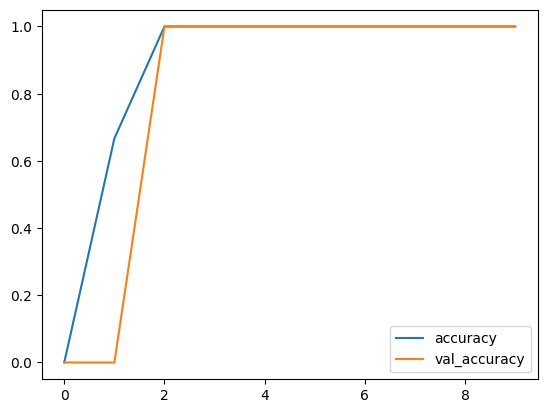

In [15]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

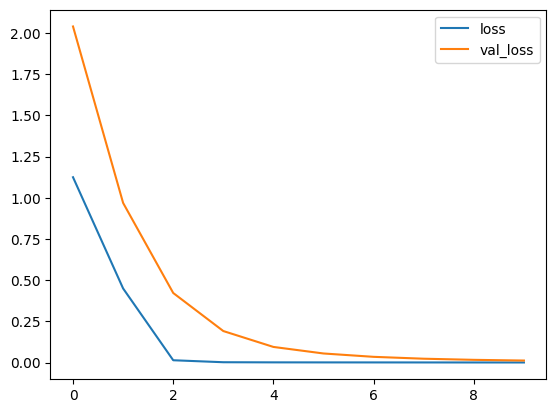

In [16]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()